### **UNIVERSIDAD GALILEO**
#### Instituto de Investigación de Operaciones
#### Posgrado en Análisis y Predicción de Datos
##### Luis Florian, 0710082

#### **Hoja de Trabajo # 2**

**Problema 1**

Desarrolle una funcion que permita hacer la binarización de una imagen, para realizarlo puede
utilizar el enfoque que prefiera. Recuerde que al binarizar una imagen esta solo puede contener los
valores 0 (negro) y 255 (blanco).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

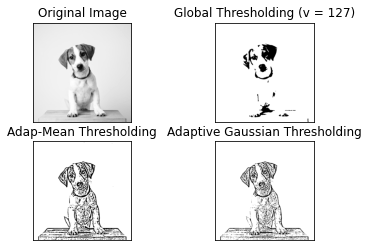

In [3]:
img = cv2.imread('perro.jpg',0)
img = cv2.medianBlur(img,5)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adap-Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
miArray = np.arange(4)
for i in miArray:
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

**Problema 2**

Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA,
AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario
que la imagen estébinarizada. Para realizar las operaciones aritméticas se recomienda seleccionar
imágenes que lo permitan y que sea fácil revisar el resultado.

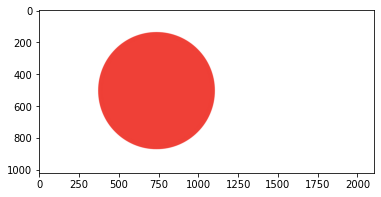

In [28]:
img = cv2.imread('Circulo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

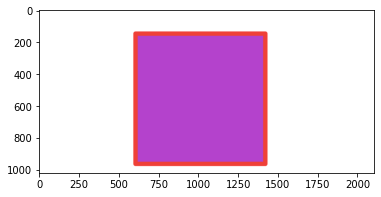

In [31]:
img2 = cv2.imread('cuadrado.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [33]:
img = cv2.imread('Circulo.png',0)
img = cv2.medianBlur(img,5)
ret,imagen1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

img2 = cv2.imread('cuadrado.png',0)
img2 = cv2.medianBlur(img2,5)
ret,imagen2 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)


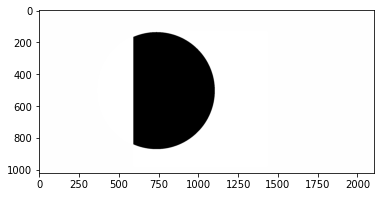

In [35]:
suma = imagen1+imagen2
plt.imshow(suma, 'gray')

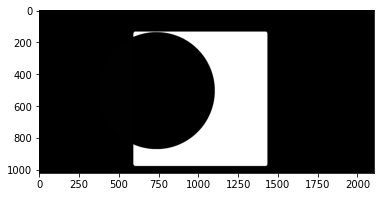

In [37]:
resta = imagen1-imagen2
plt.imshow(resta, 'gray')

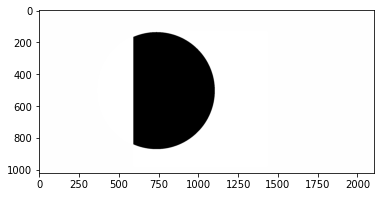

In [38]:
resta2 = imagen2+imagen1
plt.imshow(resta2, 'gray')

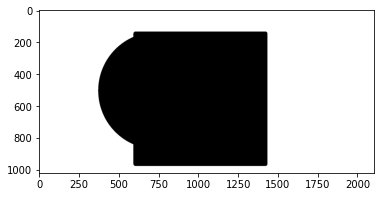

In [42]:
resultado_and = imagen1 & imagen2
plt.imshow(resultado_and, 'gray')

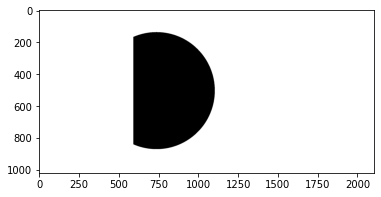

In [44]:
resultado_or = imagen1 | imagen2
plt.imshow(resultado_or, 'gray')

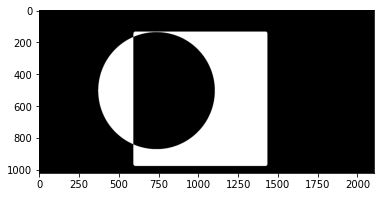

In [47]:
resultado_xor = np.logical_xor(imagen1,imagen2)
plt.imshow(resultado_xor, 'gray')